# <span style="color:#0b486b">SIT307 - Data Mining and Machine Learning</span>

---
Lecturer:   Richard Dazeley     | richard.dazeley@deakin.edu.au<br />
Assistant:  Adam Bignold | abignold@gmail.com

School of Information Technology, <br />
Deakin University, VIC 3216, Australia.


---


## <span style="color:#0b486b">Practical Session 2: Data and Visualisations with pandas</span>

**Prerequisite**
You should already have done, or be confident with the content of: 
1. Week 1 material

**The purpose of this session is:**

1. learn simple data and file operations using `pandas`
2. plot graphs using `Matplotlib` with `pandas`

**Instructions** 

1. After you download this notebook, save it as another copy and rename it to `"[yourstudentID]_Week_2_Data_and_Visualisations_with_Pandas.ipynb"`
2. fill in the code cells indicated with your own solution. You can discuss approaches with other students but must only submit your own original solution. 

## <span style="color:#0b486b">Pandas: Quick Introduction </span>
Pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive.

Pandas is well suited for many different kinds of data:
* Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
* Ordered and unordered (not necessarily fixed-frequency) time series data.
* Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
* Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure

For more information see http://pandas.pydata.org/pandas-docs/stable/. 

### <span style="color:#0b486b">Reading in Data </span>
Let’s start with reading a small comma-separated (CSV) text file – ex1.csv, since this is comma-delimited, we can use read_csv to read it into a DataFrame (assumes you have down loaded the zip file and it is in the working): 

In [1]:
import pandas as pd
df = pd.read_csv('data\\ex1.csv')
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [2]:
pd.read_table('data\\ex1.csv', sep=',')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


A file will not always have a header row – ex2.csv. To read this file, you have a couple of options. You can allow pandas to assign default column names by setting `header = None:` 

In [3]:
pd.read_csv('data\\ex2.csv', header = None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


Or you can provide your own names by setting names to an array of names. Try setting the columns to the following five `names = ['Gogo Yubari', 'Louis Gara', 'The Gimp', 'Captain Koons', 'Vernita Green']`

In [4]:
pd.read_csv('data\\ex2.csv', names=['Gogo Yubari', 'Louis Gara', 'The Gimp', 'Captain Koons', 'Vernita Green'])

,Gogo Yubari,Louis Gara,The Gimp,Captain Koons,Vernita Green
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In some cases, a table might not have a fixed delimiter, using whitespace or some other pattern to separate fields (see ex3.csv with notepad++). While you could do some munging by hand, the fields here are separated by a variable amount of whitespace. In these cases, you can pass a regular expression as a delimiter for read_table. This can be expressed by the regular expression \s+, so we have then. 

In [5]:
pd.read_table('data\\ex3.txt', sep ='\s+', names=['Pai Mei', 'Mallory Knox', 'O-Ren Ishii', 'Marsellus Wallace'])

,Pai Mei,Mallory Knox,O-Ren Ishii,Marsellus Wallace
0,A,B,C,NaN
1,aaa,-0.264438,-1.026059,-0.619500
2,bbb,0.927272,0.302904,-0.032399
3,ccc,-0.264273,-0.386314,-0.217601
4,ddd,-0.871858,-0.348382,1.100491


The parser functions have many additional arguments to help you handle the wide variety of exception file formats that occur. For example, you can skip the first, third, and fourth rows of a file with skiprows in ex4.csv

In [6]:
pd.read_csv('data\\ex4.csv')

,,,,# hey!
a,b,c,d,message
# just wanted to make things more difficult for you,NaN,NaN,NaN,NaN
# who reads CSV files with computers,anyway?,NaN,NaN,NaN
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [7]:
pd.read_csv('data\\ex4.csv', skiprows=[0, 2, 3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


Handling missing values is an important and frequently nuanced part of the file parsing process. Missing data is usually either not present (empty string) or marked by some sentinel value. By default, pandas uses a set of commonly occurring sentinels, such as NA and NULL (see ex5.csv):

In [8]:
result = pd.read_csv('data\\ex5.csv')
pd.isnull(result)

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


### <span style="color:#0b486b">Reading files in pieces </span>
When processing very large files or figuring out the right set of arguments to correctly process a large file, you may only want to read in a small piece of a file or iterate through smaller chunks of the file. Before we look at a large file, we make the pandas display settings more compact (ex6.csv). 

In [9]:
pd.read_csv('data\\ex6.csv')

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
5,1.817480,0.742273,0.419395,-2.251035,Q
6,-0.776764,0.935518,-0.332872,-1.875641,U
7,-0.913135,1.530624,-0.572657,0.477252,K
8,0.358480,-0.497572,-0.367016,0.507702,S
9,-1.740877,-1.160417,-1.637830,2.172201,G


If you want to only read a small number of rows (avoiding reading the entire file), specify that with nrows. 

In [10]:
pd.read_csv('data\\ex6.csv', nrows=5)

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q


To read a file in pieces, specify a chunksize as a number of rows. 

In [11]:
pd.read_csv('data\\ex6.csv', chunksize=1000)

This returns a TextParser object which allows you to iterate over the parts of the file according to the chunksize. For example, we can iterate over ex6.csv, aggregating the value counts in the 'key' column like so:

In [12]:
chunker = pd.read_csv('data\\ex6.csv', chunksize=5)
tot = pd.Series([])
for piece in chunker:
    tot = tot.add(piece['key'].value_counts(), fill_value=0)
tot = tot.sort_values(ascending=False)
tot[:100]

E    368.0
X    364.0
L    346.0
O    343.0
Q    340.0
M    338.0
J    337.0
F    335.0
K    334.0
H    330.0
V    328.0
I    327.0
U    326.0
P    324.0
D    320.0
A    320.0
R    318.0
Y    314.0
G    308.0
S    308.0
N    306.0
W    305.0
T    304.0
B    302.0
Z    288.0
C    286.0
4    171.0
6    166.0
7    164.0
8    162.0
3    162.0
5    157.0
2    152.0
0    151.0
9    150.0
1    146.0
dtype: float64

Writing Data to Text Format Data can also be exported to a delimited format. Let’s consider one of the CSV files read before (ex5.csv), using DataFrame’s to_csv method, we can write the data out to a comma-separated file (out.csv):

In [13]:
data=pd.read_csv('data\\ex5.csv')
data.to_csv('data\\out.csv')

### <span style="color:#0b486b">JSON Data </span>
JSON (short for JavaScript Object Notation) has become one of the standard formats for sending data by HTTP request between web browsers and other applications. It is a much more free-form data format than a tabular text form like CSV.  JSON is very nearly valid Python code with the exception of its null value null and some other nuances (such as disallowing trailing commas at the end of lists). The basic types are objects (dicts), arrays (lists), strings, numbers, booleans, and nulls. All of the keys in an object must be strings. There are several Python libraries for reading and writing JSON data. Module json will be used here, as it is built into the Python standard library. To convert a JSON string to Python form, use json.loads: 
 
 

In [14]:
import json
obj = """
{"name": "Wes", 
"places_lived": ["United States", "Spain", "Germany"],
"pet": null,
"siblings": [{"name": "Scott", "age": 30, "pets":["Zeus", "Zuko"]},
{"name": "Katie", "age":38,
"pets": ["Sixes", "Stache", "Cisco"]}]
}
"""
result = json.loads(obj)
result

{'name': 'Wes',
 'pet': None,
 'places_lived': ['United States', 'Spain', 'Germany'],
 'siblings': [{'age': 30, 'name': 'Scott', 'pets': ['Zeus', 'Zuko']},
  {'age': 38, 'name': 'Katie', 'pets': ['Sixes', 'Stache', 'Cisco']}]}

The pandas.read_json can automatically convert JSON datasets in specific arrangements into a Series or DataFrame. The default options for pandas.read_json assume that each object in the JSON array is a row in the table: 

In [15]:
data = pd.read_json('data\\example.json')
data

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


### <span style="color:#0b486b">Binary Data Formats </span>
One of the easiest ways to store data (also known as serialization) efficiently in binary format is using Python’s built-in pickle serialization. pandas objects all have a to_pickle method that writes the data to disk in pickle format. You can read any “pickled” object stored in a file by using the built-in pickle directly, or even more conveniently using pandas.read_pickle:

In [16]:
frame = pd.read_csv('data\\ex1.csv')
frame.to_pickle('data\\frame_pickle')
pd.read_pickle('data\\frame_pickle')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


### <span style="color:#0b486b">HDF5 Format </span>
HDF5 is a well-regarded file format intended for storing large quantities of scientific array data. It is available as a C library, and it has interfaces available in many other languages, including Java, Julia, MATLAB, and Python. The “HDF” in HDF5 stands for hierarchical data format. Each HDF5 file can store multiple datasets and supporting metadata. Compared with simpler formats, HDF5 supports on-the-fly compression with a variety of compression modes, enabling data with repeated patterns to be stored more efficiently. HDF5 can be a good choice for working with very large datasets that don’t fit into memory, as you can efficiently read and write small sections of much larger arrays. While it’s possible to directly access HDF5 files using either the PyTables or h5py libraries, pandas provides a high-level interface that simplifies storing Series and DataFrame object. The HDFStore class works like a dict and handles the low-level details: 

In [17]:
import pandas as pd
import numpy as np

frame = pd.DataFrame({'a': np.random.randn(100)})
store = pd.HDFStore('data\\mydata.h5')
store['obj1'] = frame
store['obj1_col'] = frame['a']
store

<class 'pandas.io.pytables.HDFStore'>
File path: data\mydata.h5

In [18]:
store['obj1']

,a
0,-0.884361
1,0.527802
2,0.077526
3,0.081051
4,-0.486184
5,-0.618125
6,-1.931512
7,-0.504256
8,-0.418824
9,0.852242


### <span style="color:#0b486b">Reading Microsoft Excel Files </span>
pandas also supports reading tabular data stored in Excel 2003 (and higher) files using either the ExcelFile class or pandas.read_excel function. Internally these tools use the add-on packages xlrd and openpyxl to read XLS and XLSX files, respectively. You may need to install these manually with pip or conda. To use ExcelFile, create an instance by passing a path to an xls or xlsx file: 
 
 

In [19]:
import pandas as pd
import numpy as np

xlsx = pd.ExcelFile('data\\ex1.xlsx')
pd.read_excel(xlsx, 'Sheet1')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


If you are reading multiple sheets in a file, then it is faster to create the ExcelFile, but you can also simply pass the filename to pandas.read_excel: 

In [20]:
frame = pd.read_excel('data\\ex1.xlsx', 'Sheet1')
frame

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


To write pandas data to Excel format, you must first create an ExcelWriter, then write data to it using pandas objects’ to_excel method: 

In [21]:
import pandas as pd
import numpy as np

frame = pd.read_excel('data\\ex1.xlsx', 'Sheet1')
writer = pd.ExcelWriter('data\\ex2.xlsx')
frame.to_excel(writer, 'Sheet1')
writer.save()

### <span style="color:#0b486b">Interacting with Web APIs </span>
Many websites have public APIs providing data feeds via JSON or some other format. There are a number of ways to access these APIs from Python; one easy-to-use method is the requests package. To find the last 30 GitHub issues for pandas on GitHub, we can make a GET HTTP request using the add-on requests library: 

In [22]:
import pandas as pd
import requests

url = 'https://api.github.com/repos/pandas-dev/pandas/issues'
resp = requests.get(url)
data = resp.json()
data[0]['title']

'Defaulting to_csv to infer compression'

In [23]:
issues = pd.DataFrame(data,columns=['number', 'title', 'labels', 'state'])
issues

,number,title,labels,state
0,22004,Defaulting to_csv to infer compression,"[{'id': 76812, 'node_id': 'MDU6TGFiZWw3NjgxMg=...",open
1,22003,IntegerArray docs follow-up,[],open
2,22002,[CLN] Remove Unneeded BlockManager methods,[],open
3,22001,"[CLN] De-privatize core.common funcs, remove u...","[{'id': 211029535, 'node_id': 'MDU6TGFiZWwyMTE...",open
4,22000,[Enhancement] Can `by` arg in `.sort_index()` ...,"[{'id': 76812, 'node_id': 'MDU6TGFiZWw3NjgxMg=...",open
5,21998,ENH: Interval type should support intersection...,"[{'id': 76812, 'node_id': 'MDU6TGFiZWw3NjgxMg=...",open
6,21996,Inconsistent behaviour on sep/delimiter for pa...,"[{'id': 87485152, 'node_id': 'MDU6TGFiZWw4NzQ4...",open
7,21995,TST: read_csv silently drops empty row,"[{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...",open
8,21994,TST: tuple and namedtuple multiindex tests for...,[],open
9,21993,SparseDataFrame empty slice coerces to loses d...,"[{'id': 31404521, 'node_id': 'MDU6TGFiZWwzMTQw...",open


### <span style="color:#0b486b">Interacting with Databases  </span>
In a business setting, most data may not be stored in text or Excel files. SQL-based relational databases (such as SQL Server, PostgreSQL, and MySQL) are in wide use, and many alternative databases have become quite popular. The choice of database is usually dependent on the performance, data integrity, and scalability needs of an application. Loading data from SQL into a DataFrame is straightforward, and pandas has some functions to simplify the process. As an example, a SQLite database is created using Python’s built-in sqlite3 driver: 

In [24]:
import pandas as pd
import sqlite3

query = """
CREATE TABLE test
(a VARCHAR(20), b VARCHAR(20),
c REAL, d INTEGER
); """

In [25]:
con = sqlite3.connect('data\\mydata.sqlite')
con.execute(query)
con.commit()
con

In [26]:
#insert 3 rows of data
data = [('Atlanta', 'Georgia', 1.25, 6),
        ('Tallahassee', 'Florida', 2.6, 3),
        ('Sacramento', 'California', 1.7, 5)]

In [27]:
stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"
con.executemany(stmt, data)
con.commit()

In [28]:
#select data from a table:
cursor = con.execute('select * from test')
rows = cursor.fetchall()
rows

[('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5)]

## <span style="color:#0b486b">2. Matplotlib</span>

In this section we will quickly look at using Matplotlib with pandas
The plot method on `Series` and `DataFrame` is just a simple wrapper around `plt.plot():`

Section based on https://pandas.pydata.org/pandas-docs/stable/visualization.html.

<IPython.core.display.Javascript object>


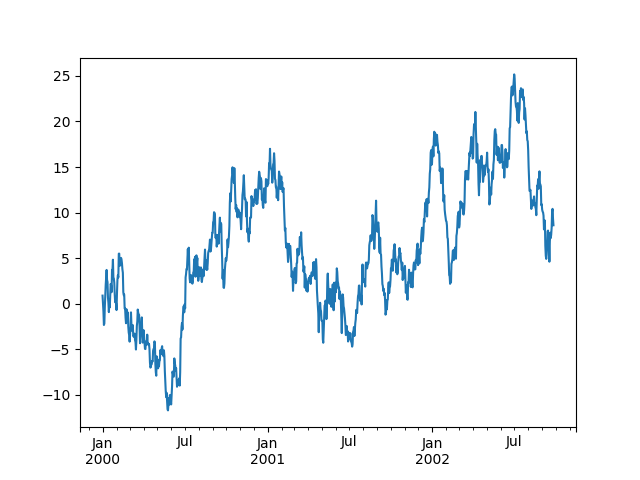

In [30]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

By giving the index dates, it calls `gcf().autofmt_xdate()` to format the x-axis.

On `DataFrame`, `plot()` is a convenience to plot all of the columns with labels:

<IPython.core.display.Javascript object>


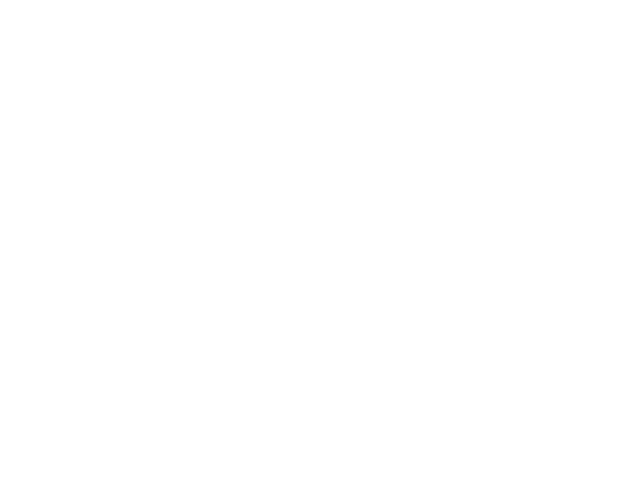

<IPython.core.display.Javascript object>


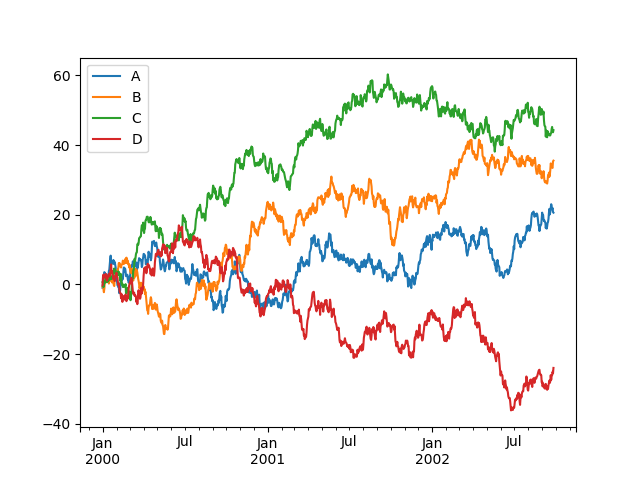

In [32]:
%matplotlib notebook
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
plt.figure()
df.plot()

You can also plot one column against a second using the x and y keywords in plot():

<IPython.core.display.Javascript object>


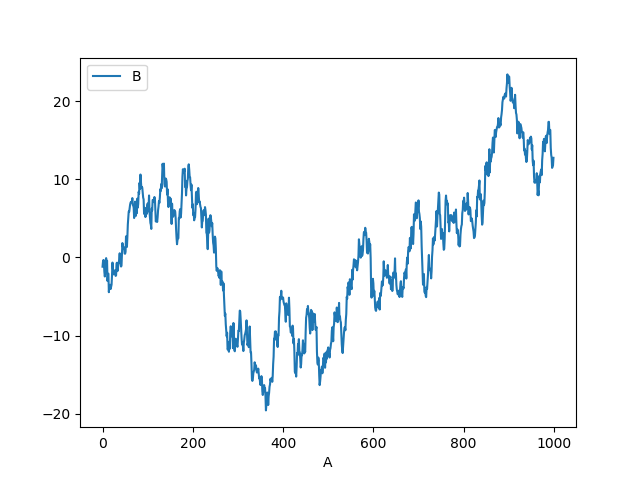

In [33]:
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()
df3['A'] = pd.Series(list(range(len(df))))
df3.plot(x='A', y='B')

### <span style="color:#0b486b">Bar plot</span>


<IPython.core.display.Javascript object>


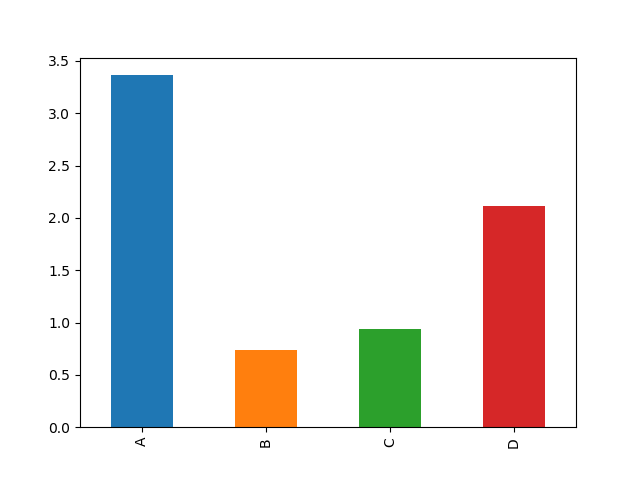

In [34]:
plt.figure();

df.iloc[5].plot(kind='bar');

<IPython.core.display.Javascript object>


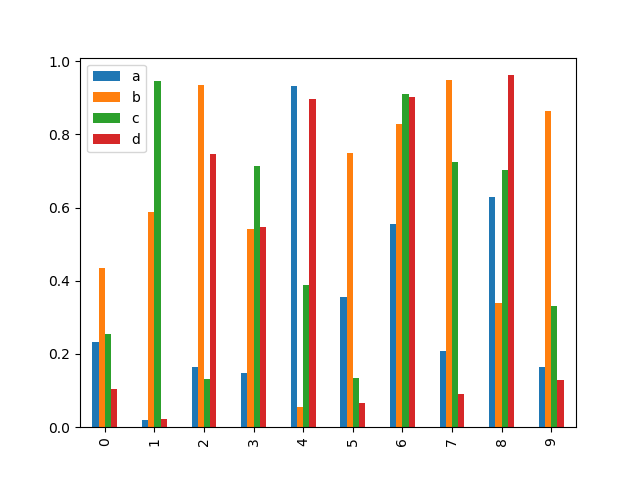

In [35]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

df2.plot.bar();

<IPython.core.display.Javascript object>


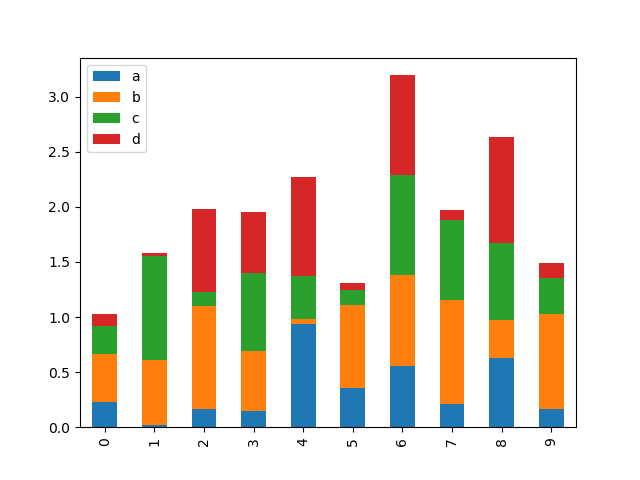

In [36]:
df2.plot.bar(stacked=True);

<IPython.core.display.Javascript object>


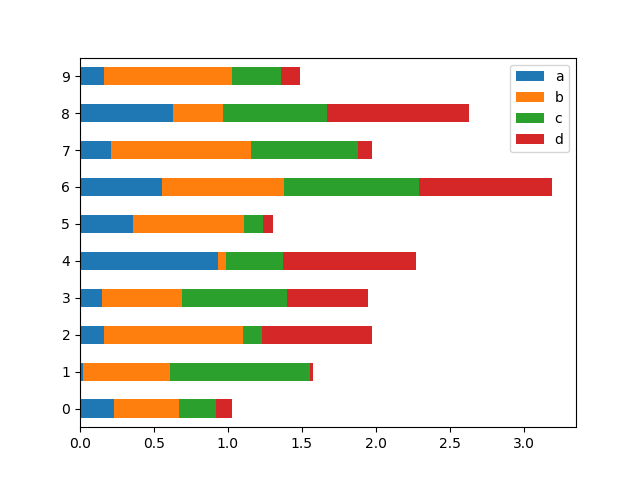

In [37]:
df2.plot.barh(stacked=True);

### <span style="color:#0b486b">Histograms</span>
Histograms can be drawn by using the `DataFrame.plot.hist()` and `Series.plot.hist()` methods.

<IPython.core.display.Javascript object>


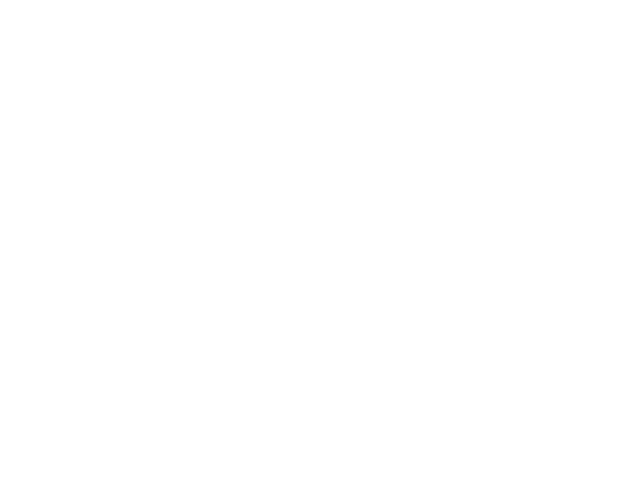

<IPython.core.display.Javascript object>


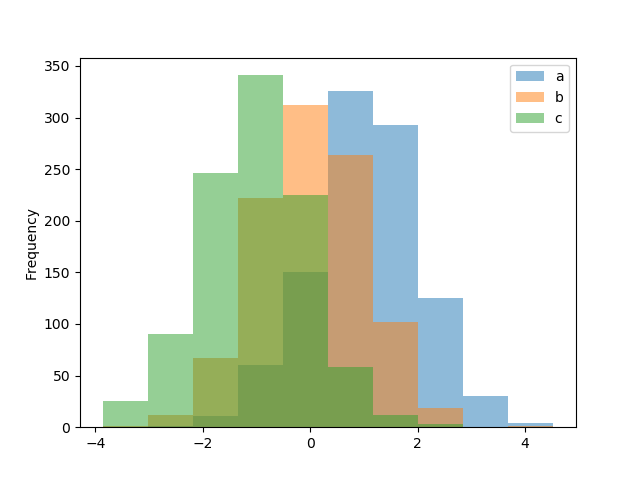

In [38]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
                    'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])
plt.figure();
df4.plot.hist(alpha=0.5)

<IPython.core.display.Javascript object>


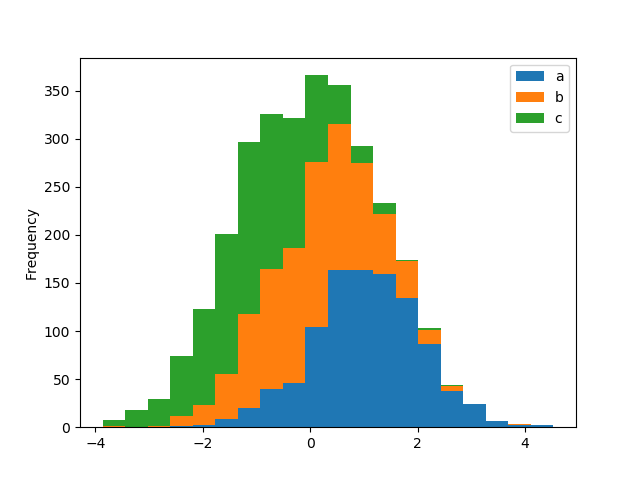

In [39]:
df4.plot.hist(stacked=True, bins=20)

### <span style="color:#0b486b">Box Plot</span>
Histograms can be drawn by using the DataFrame.plot.hist() and Series.plot.hist() methods.

<IPython.core.display.Javascript object>


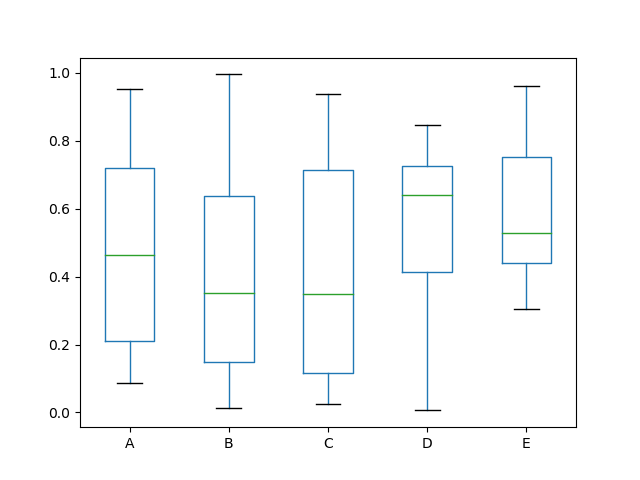

In [40]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])

df.plot.box()

Boxplot can be colorized by passing `color` keyword. You can pass a `dict` whose keys are `boxes`, `whiskers`, `medians` and `caps`. If some keys are missing in the `dict`, default colors are used for the corresponding artists. Also, boxplot has `sym` keyword to specify fliers style.

When you pass other type of arguments via `color` keyword, it will be directly passed to `matplotlib` for all the `boxes`, `whiskers`, `medians` and `caps` colorization.

The colors are applied to every boxes to be drawn. If you want more complicated colorization, you can get each drawn artists by passing return_type.

<IPython.core.display.Javascript object>


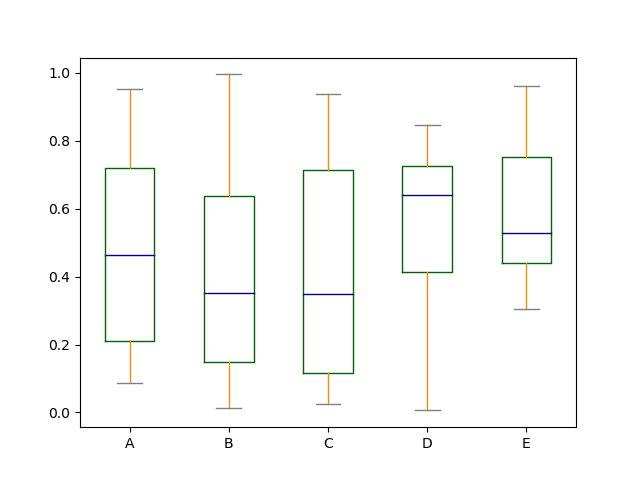

In [41]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',
             medians='DarkBlue', caps='Gray')


df.plot.box(color=color, sym='r+')

<IPython.core.display.Javascript object>


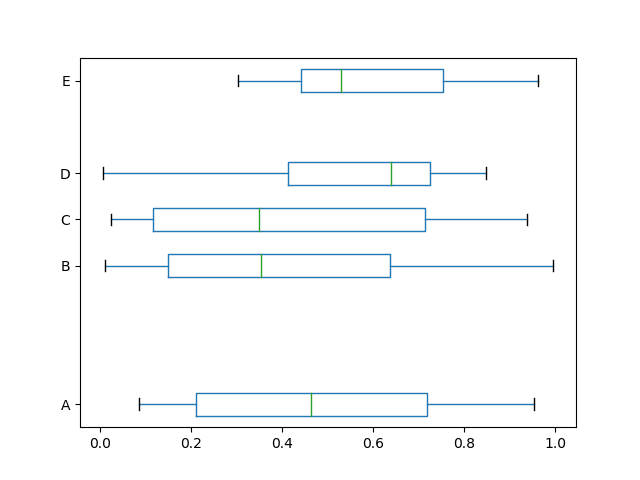

In [42]:
df.plot.box(vert=False, positions=[1, 4, 5, 6, 8])

### <span style="color:#0b486b">Area Plot</span>
You can create area plots with `Series.plot.area()` and `DataFrame.plot.area()`. Area plots are stacked by default. To produce stacked area plot, each column must be either all positive or all negative values.

When input data contains `NaN`, it will be automatically filled by 0. If you want to drop or fill by different values, use `dataframe.dropna()` or `dataframe.fillna()` before calling plot.

<IPython.core.display.Javascript object>


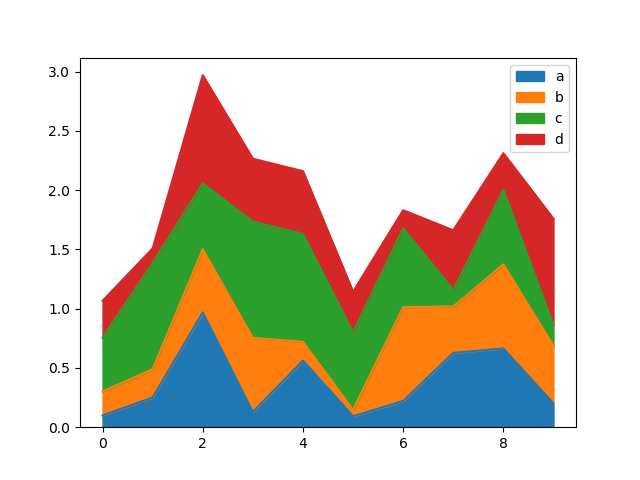

In [43]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

df.plot.area();

To produce an unstacked plot, pass `stacked=False`. Alpha value is set to `0.5` unless otherwise specified:

<IPython.core.display.Javascript object>


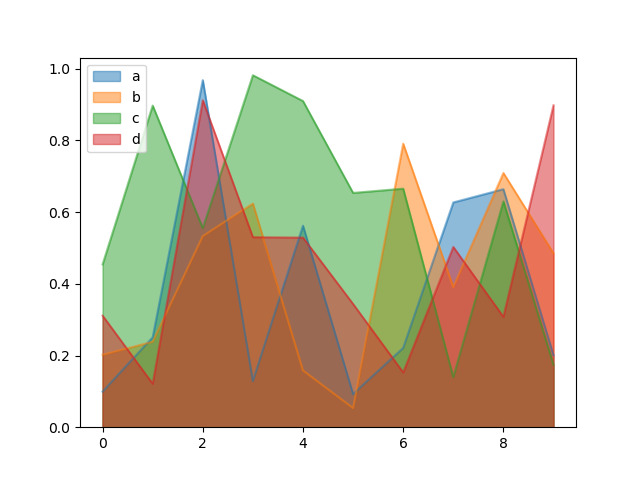

In [44]:
df.plot.area(stacked=False);

### <span style="color:#0b486b">Scatter Plot</span>
Scatter plot can be drawn by using the `DataFrame.plot.scatter()` method. Scatter plot requires numeric columns for the `x` and `y` axes. These can be specified by the `x` and `y` keywords.

<IPython.core.display.Javascript object>


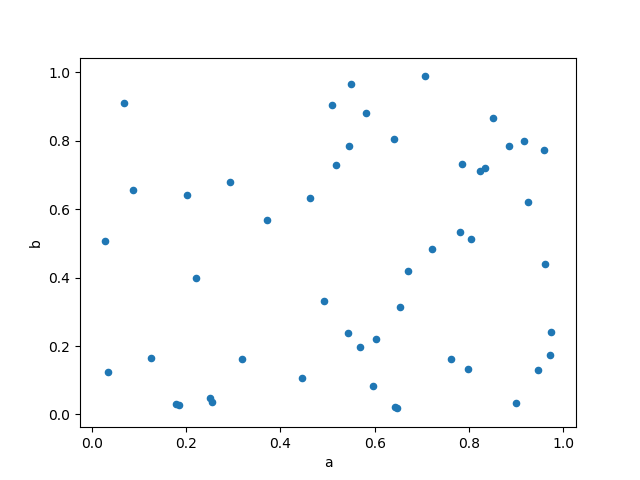

In [45]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
df.plot.scatter(x='a', y='b');

To plot multiple column groups in a single axes, repeat `plot` method specifying target `ax`. It is recommended to specify `color` and `label` keywords to distinguish each groups.

<IPython.core.display.Javascript object>


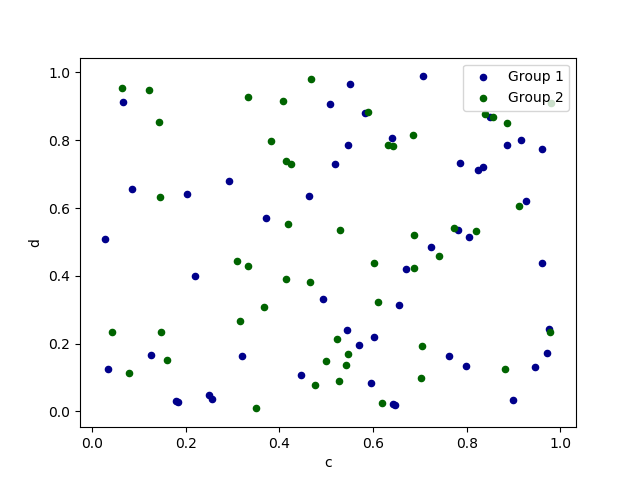

In [46]:
ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1');
df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax);

The keyword `c` may be given as the name of a column to provide colors for each point:

<IPython.core.display.Javascript object>


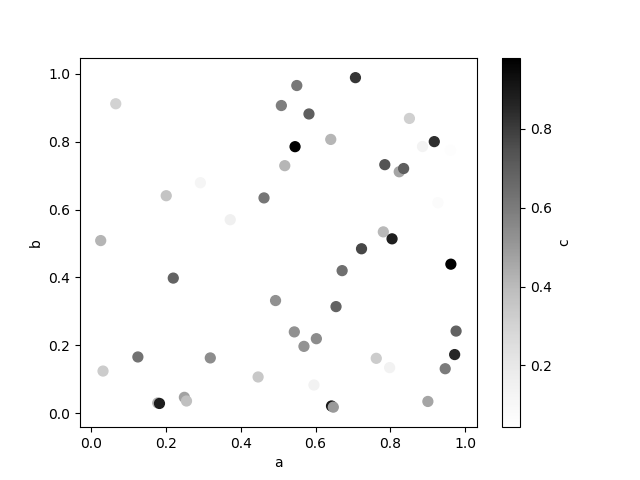

In [47]:
df.plot.scatter(x='a', y='b', c='c', s=50);

You can pass other keywords supported by matplotlib `scatter`. The example below shows a bubble chart using a column of the `DataFrame` as the bubble size.

<IPython.core.display.Javascript object>


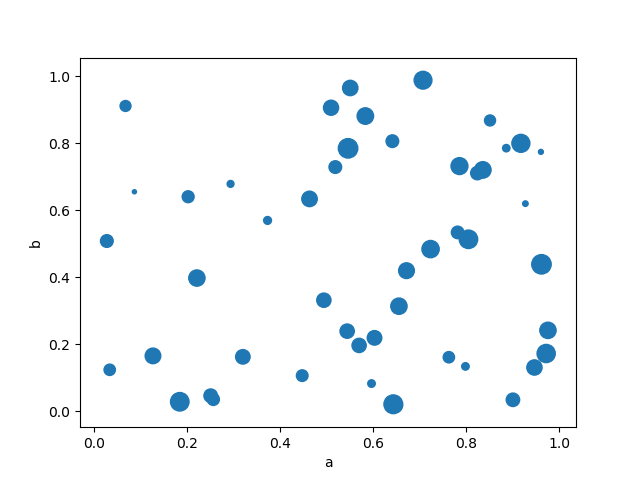

In [48]:
df.plot.scatter(x='a', y='b', s=df['c']*200);

There are significantly more options to plot graphs from pandas. See the pandas [cookbook](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook-plotting) for more options.